In [615]:
"""
Created on Thu Sep 30 10:15:33 2021

@author: kirahart
"""

from SQL import create_db_connection, execute_query, read_query
import h5py
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('seaborn-whitegrid')



In [616]:
dftelem = pd.read_csv('/Volumes/KESU/SQL_Queries/Measurements.csv')

In [617]:
#LOAD IN CALIBRATION DATA
save_path =   '/Volumes/KESU/calibration_files/'
name =  "LUT0519.h5" 

hf = h5py.File(save_path+name, 'r')
gamma1 = hf['gamma1'][()]
gamma2 = hf['gamma2'][()]
hf.close()

save_path =   '/Volumes/KESU/calibration_files/'
name =  "POL.h5" 
hf = h5py.File(save_path+name, 'r')
delta = hf['delta'][()]
A     = hf['A'][()]
B     = hf['B'][()]
hf.close()

In [618]:
#user_info
pw = "p0larizati0n"
user = "root"
db = "IRCSP"

#connect to IRCSP database
connection = create_db_connection("localhost", user, pw, db)

MySQL Database connection successful


In [619]:
def query_wavelength(db, wavelength,camera):
    string = ''' SELECT id, camera, val '''
    string += '''FROM '''+ db + ''' '''
    string+= '''WHERE wavelength = ''' + str(wavelength) +''' AND camera ='''+ str(camera)+''';'''
    return(string)

def query_id(db, idn,camera):
    string = ''' SELECT wavelength, camera, val '''
    string += '''FROM '''+ db + ''' '''
    string+= '''WHERE id = ''' + str(idn) +''' AND camera ='''+ str(camera)+''';'''
    return(string)
    

In [620]:
def db_wavelength(db, wavelength,camera):
    # Returns a list of lists and then creates a pandas DataFrame
    from_db = []
    query = query_wavelength(db, wavelength,camera);
    results = read_query(connection,query)

    for result in results:
      result = list(result)
      from_db.append(result)


    columns = ["id", "camera", "value"]
    df = pd.DataFrame(from_db, columns=columns)
    
    return(df)

def db_id(db, idn,camera):
    # Returns a list of lists and then creates a pandas DataFrame
    from_db = []
    query = query_id(db, idn,camera);
    results = read_query(connection,query)

    for result in results:
      result = list(result)
      from_db.append(result)


    columns = ["wavelength", "camera", "value"]
    df = pd.DataFrame(from_db, columns=columns)
    
    return(df)

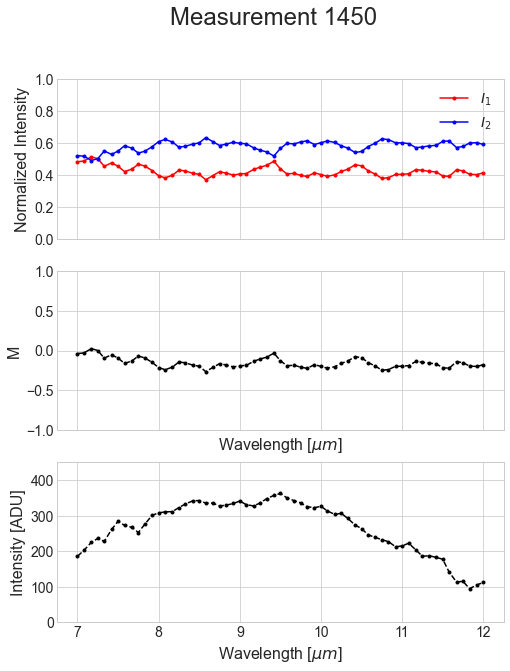

In [622]:
offset = 500
index = 1450;


db1 = db_id('IRCSP.rawdata', index,1)
db2 = db_id('IRCSP.rawdata', index,2)
val1 =(np.array(db1['value']))
val2 =(np.array(db2['value']))
norm =  val1 + val2;

#


fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',figsize = (8,10))

ax[0].plot(db1ref['wavelength'],(val1)/norm,'r.-',label = "$I_1$")
ax[0].plot(db1ref['wavelength'],(val2)/norm,'b.-',label = "$I_2$")
ax[0].set_ylim([0,1])
ax[0].legend()
ax[0].set_ylabel('Normalized Intensity')

ax[1].plot(db1ref['wavelength'],(val1-val2)/norm ,'k.--')
ax[1].set_xlabel('Wavelength [$\mu m$]')
ax[1].set_ylabel('M')
ax[1].set_ylim([-1,1])

ax[2].plot(db1ref['wavelength'],(val1/gamma1 + val2/gamma2)+offset ,'k.--')
ax[2].set_xlabel('Wavelength [$\mu m$]')
ax[2].set_ylabel('Intensity [ADU]')
ax[2].set_ylim([0,450])


fig.suptitle('Measurement ' +str(index))

plt.show()

In [390]:
#TAKE X DATA FROM MEASUREMENTS 

cam1t    = dftelem['cam1_temp']
humidity = dftelem['humidity']
time = dftelem['time']

df8_1 =  db_wavelength('IRCSP.rawdata', 8,1)
df8_2 =  db_wavelength('IRCSP.rawdata', 8,2)
df9_1 =  db_wavelength('IRCSP.rawdata', 9,1)
df9_2 =  db_wavelength('IRCSP.rawdata', 9,2)
df10_1 =  db_wavelength('IRCSP.rawdata', 10,1)
df10_2 =  db_wavelength('IRCSP.rawdata', 10,2)
df11_1 =  db_wavelength('IRCSP.rawdata', 11,1)
df11_2 =  db_wavelength('IRCSP.rawdata', 11,2)
df12_1 =  db_wavelength('IRCSP.rawdata', 12,1)
df12_2 =  db_wavelength('IRCSP.rawdata', 12,2)

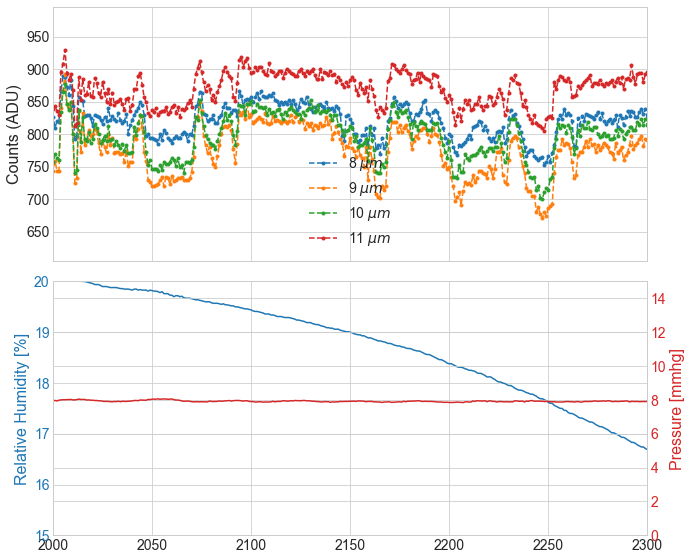

<Figure size 1224x504 with 0 Axes>

In [519]:
mi = 2000
ma = 2300

fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,8),sharex = True)
plt.figure(figsize=(17, 7))
ax[0].plot(df8_1["value"]+df8_2["value"] +offset*2 , '.--',label = '8 $ \mu m$')
ax[0].plot(df9_1["value"]+df9_2["value"]+offset*2 , '.--',label = '9 $ \mu m$')
ax[0].plot(df10_1["value"]+df10_2["value"]+offset*2 , '.--',label = '10 $ \mu m$')
ax[0].plot(df11_1["value"]+df11_2["value"]+offset*2, '.--',label = '11 $ \mu m$')
#plt.plot(df12_1["value"]/gamma1[60]+df12_2["value"]/gamma2[60], '.-',label = '12 $ \mu m$')

ax[0].legend()
ax[0].set_xlim(mi,ma)
ax[0].set_ylabel('Counts (ADU)')

color = 'tab:blue'
ax[1].plot(dftelem['humidity'], color = color )
ax[1].set_ylabel( "Relative Humidity [%]",color = color)
ax[1].set_xlim(mi,ma)
ax[1].set_ylim(15,20)
ax[1].tick_params(axis='y', labelcolor=color)

ax2 = ax[1].twinx()
color = 'tab:red'
ax2.set_ylabel('Pressure [mmhg]', color=color) 
ax2.plot(pressures ,color = color)
ax2.tick_params(axis='y', labelcolor=color)
ax[1].set_xlim(mi,ma)
ax2.set_ylim(0,15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


In [595]:
response = [];
for w in range(1366,2500):
    df1 =  db_id('IRCSP.rawdata', w,1)
    df2 =  db_id('IRCSP.rawdata', w,2)
    v = df1["value"]/gamma1+df2["value"]/gamma2 +offset
    response.append(v)

Text(0, 0.5, 'Wavelength [$\\mu m$]')

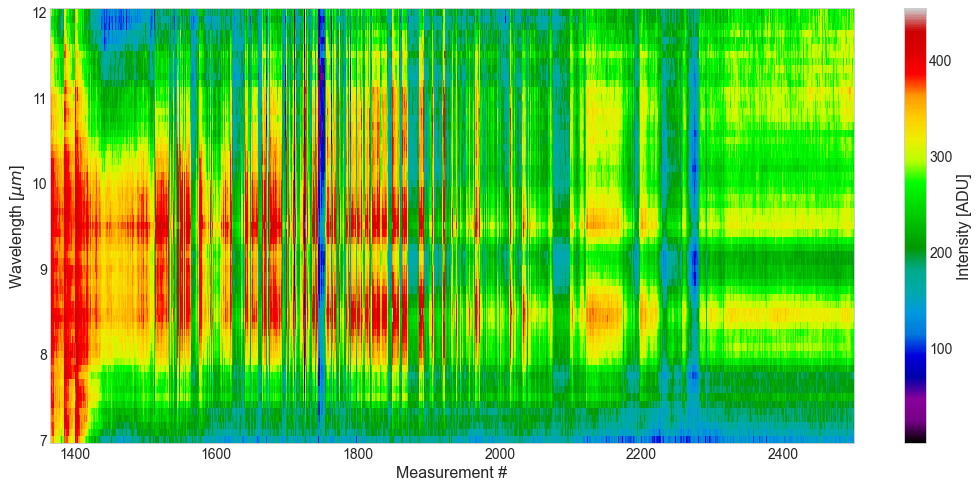

In [603]:

fig = plt.figure(figsize=(18,8))
plt.pcolormesh(meas,waves,np.transpose(response),shading='auto',cmap = 'nipy_spectral')
plt.colorbar(label = "Intensity [ADU]")
plt.xlabel('Measurement #')
plt.ylabel('Wavelength [$\mu m$]')

In [609]:
modulation = [];
for w in range(1366,2500):
    df1 =  db_id('IRCSP.rawdata', w,1)
    df2 =  db_id('IRCSP.rawdata', w,2)
    v = (df1["value"]/gamma1-df2["value"])/(df1["value"]/gamma1+df2["value"]) 
    modulation.append(v)

Text(0, 0.5, 'Wavelength [$\\mu m$]')

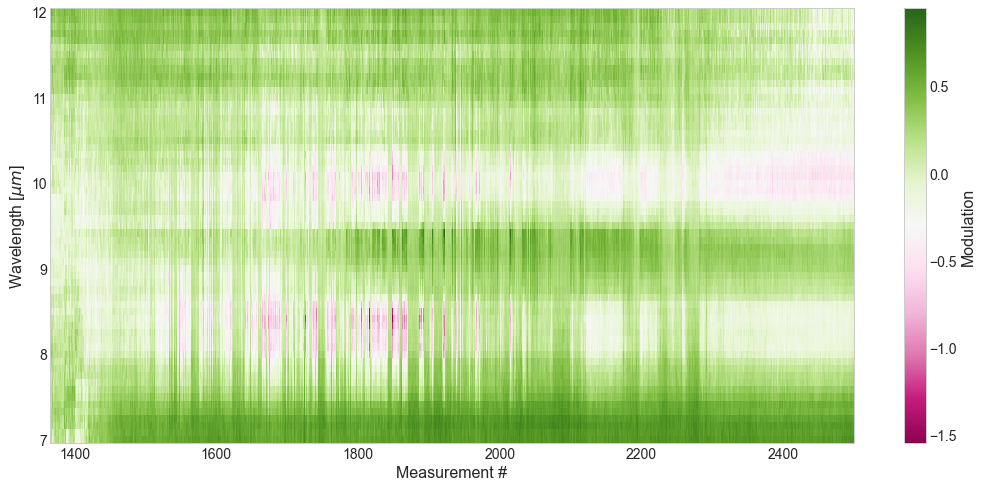

In [613]:
fig = plt.figure(figsize=(18,8))
plt.pcolormesh(meas,waves,np.transpose(modulation),shading='auto',cmap = 'PiYG')
plt.colorbar(label = "Modulation")
plt.xlabel('Measurement #')
plt.ylabel('Wavelength [$\mu m$]')
